### <font color='red'> Project 2 : Buzz Prediction on Twitter

Project Description:
- There are two different datasets for Regression and Classification tasks. Right-most column in both the datasets is a dependent variable i.e. buzz.
- Data description files are also provided for both the datasets.
- Deciding which dataset is for which task is part of the project.
- Read data into Jupyter notebook, use pandas to import data into a data frame.
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN regressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

Classification Task:
- Decide about a good evaluation strategy and justify your choice.
- Find best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kernelized Support Vector Machine, Decision Tree. 
- Which model gives the best results?


In [1]:
#import required packages
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

In [2]:
#read data in dataframe
cols = ['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6','AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3','BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1','AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6','AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0','ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6','Anotation']
df = pd.read_csv('Twitter.data', header = None)
df.columns = cols

In [3]:
#check missing values
null_data = df[df.isnull().any(axis=1)]
print("missing values: ", len(null_data))

missing values:  0


In [23]:
df.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Anotation
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,...,0.0,1.0,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,...,1.0,1.0,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,...,0.0,1.0,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,0,1,0,0,1,2,3,0.5


In [50]:
df.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Anotation
count,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,...,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000
mean,140.339640,136.770147,159.679271,181.592091,201.097445,220.175371,219.388214,71.038051,69.829631,82.198203,...,1.136688,1.140372,140.789860,137.181270,160.105922,182.057440,201.596482,220.705900,219.936864,191.279493
std,431.772639,432.305129,502.057428,574.883713,630.448432,669.205930,672.182204,196.876718,202.199758,239.523042,...,1.432327,1.552313,432.624954,433.026611,502.774408,575.658022,631.258318,670.050977,673.032541,612.352354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,4.500000
50%,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,30.000000,11.000000,11.000000,13.000000,...,1.000000,1.000000,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,31.000000,25.500000
75%,104.000000,100.000000,115.000000,131.000000,147.000000,166.000000,164.000000,59.000000,57.000000,65.000000,...,1.090909,1.091296,104.000000,101.000000,115.000000,131.000000,148.000000,167.000000,165.000000,139.000000
max,24210.000000,29574.000000,37505.000000,72366.000000,79079.000000,79079.000000,79079.000000,18654.000000,22035.000000,29402.000000,...,262.000000,295.000000,24301.000000,29574.000000,37505.000000,72366.000000,79083.000000,79083.000000,79083.000000,75724.500000


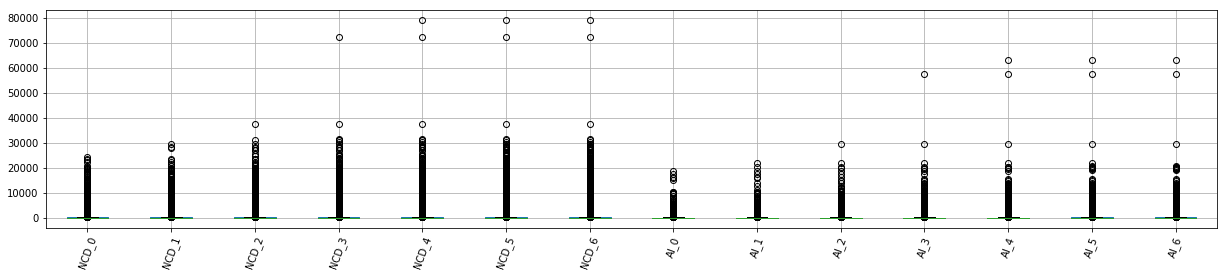

In [16]:
#exploring the data to check statistical dispersion
df.boxplot(column = cols[0:14], rot = 70, figsize= (21, 4))

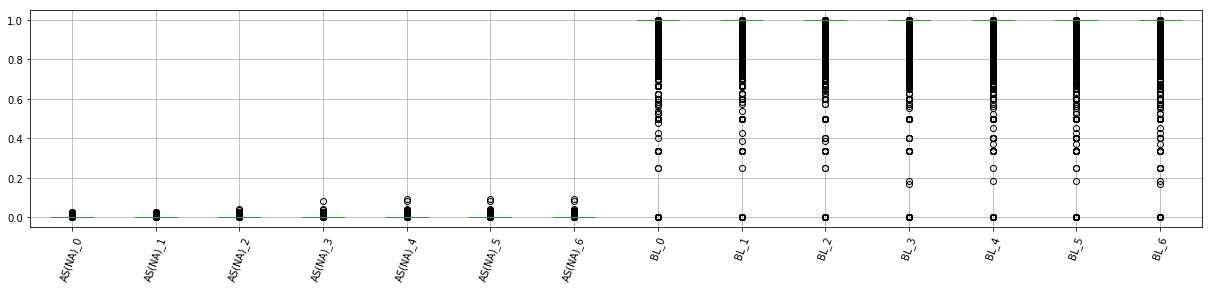

In [17]:
df.boxplot(column = cols[14:28], rot = 70, figsize= (21, 4))

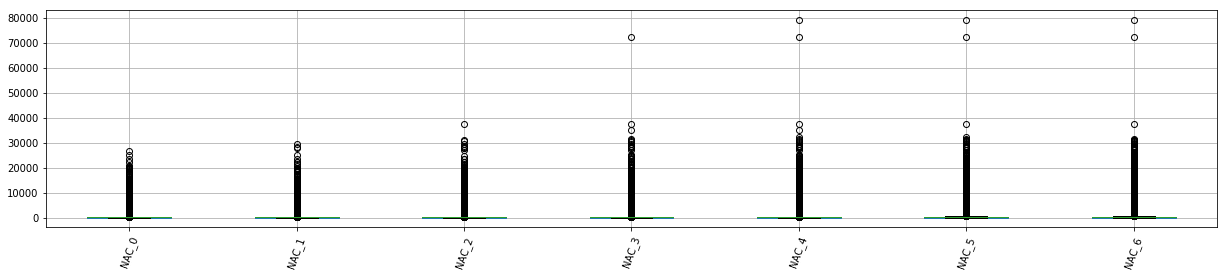

In [18]:
df.boxplot(column = cols[28:35], rot = 70, figsize= (21, 4))

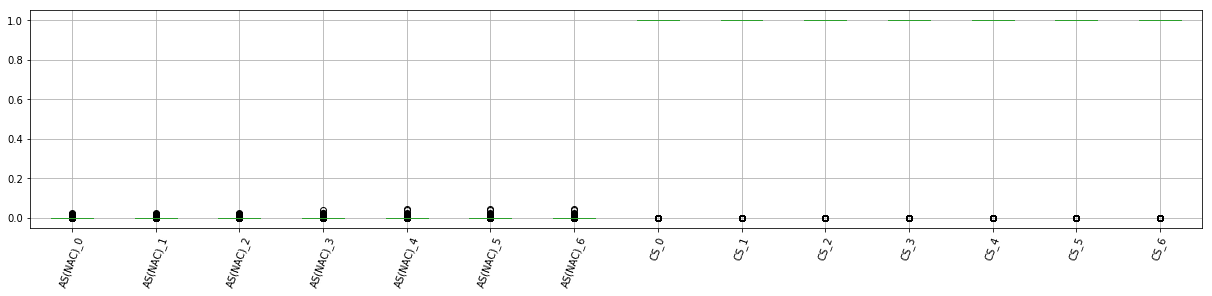

In [19]:
df.boxplot(column = cols[35:49], rot = 70, figsize= (21, 4))

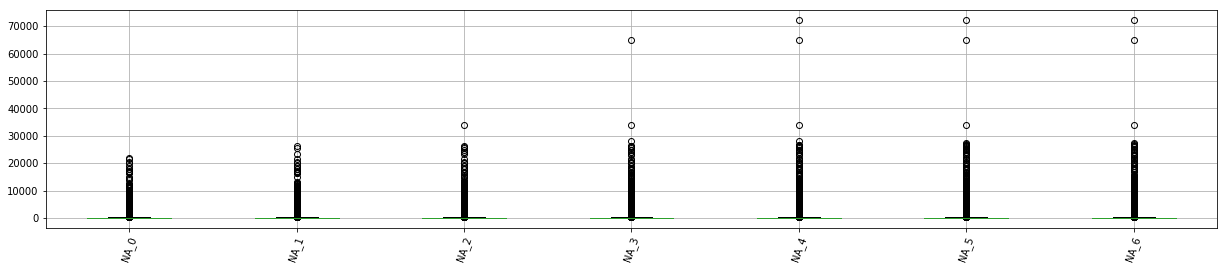

In [20]:
df.boxplot(column = cols[56:63], rot = 70, figsize= (21, 4))

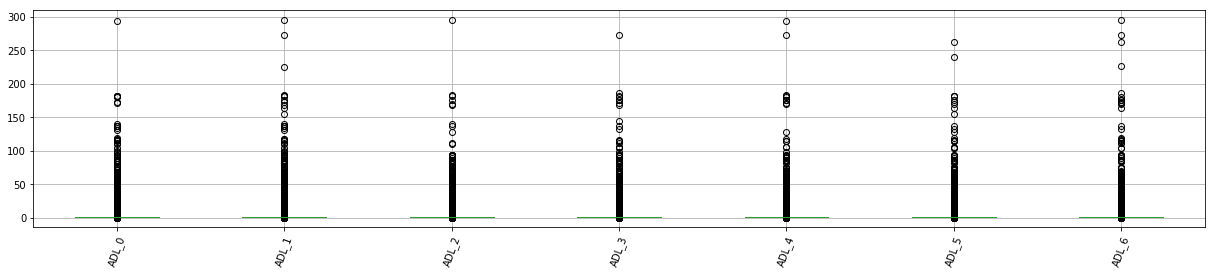

In [21]:
df.boxplot(column = cols[63:70], rot = 70, figsize= (21, 4))

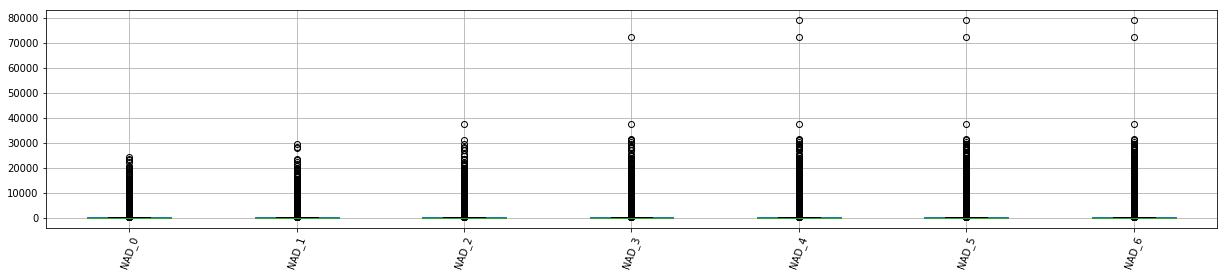

In [22]:
df.boxplot(column = cols[70:77], rot = 70, figsize= (21, 4))

#creating a small dataset for computing ease
sample_data = df.iloc[1000:2000, 0:77]
sample_target = df.iloc[1000:2000, -1]

In [24]:
# markdow previous cell, then convert and execute this cell to code to flip dataset
from sklearn.model_selection import train_test_split
_, sample_data, _, sample_target = train_test_split(df.iloc[:, 0:77], df.iloc[:, -1], random_state = 0, test_size = 0.1)

SCALING & SPLITTING TRAIN TEST SPLIT for reducing computational complexity

After splitting the data for train and test, we transformed the feature set using 4 different methods (MinMax Scaler, Standard Scaler, Normalizer (l1), Normalizer (l2)).

We finalized MinMax Scaler to transform the training and testing feature set for both computation ease and superior accuracy compared to other transformations. This method scales and translates each feature individually such that it is in the given range on the training set, i.e. between zero and one.

For SVR (kernal = RBF), we have used Standard Scaler as it many elements used in the objective function of a learning algorithm assume that all features are centered around 0 and have variance in the same order.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler  # b/w 0 & 1
from sklearn.preprocessing import StandardScaler # scaled using unit variance
from sklearn.preprocessing import Normalizer # b/w -1 & +1 (l2)

X_train_1, X_test_1, y_train, y_test = train_test_split(sample_data, sample_target, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train_mm = pd.DataFrame(scaler.fit_transform(X_train_1))
X_test_mm = pd.DataFrame(scaler.transform(X_test_1))

scaler = StandardScaler()
X_train_ss = pd.DataFrame(scaler.fit_transform(X_train_1))
X_test_ss = pd.DataFrame(scaler.fit_transform(X_test_1))

scaler = Normalizer(norm='l1')
X_train_nl1 = pd.DataFrame(scaler.fit_transform(X_train_1))
X_test_nl1 = pd.DataFrame(scaler.fit_transform(X_test_1))

scaler = Normalizer(norm='l2')
X_train_nl2 = pd.DataFrame(scaler.fit_transform(X_train_1))
X_test_nl2 = pd.DataFrame(scaler.fit_transform(X_test_1))

X_train = X_train_mm
X_test = X_test_mm

# Linear Regression (using normal equation)
Linear model that minimizes ordinary least square as the cost function. Produces high accuracy when predicting dependent variable in this dataset.

In [6]:
#LINEAR REGRESSION with the normal equation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
param_grid = {}
grid_lreg = GridSearchCV(LinearRegression(), param_grid, cv=5, n_jobs= -1)
grid_lreg.fit(X_train, y_train)

print("Best Parameters : {}".format(grid_lreg.best_params_))
print("Best CV score   : {}".format('%.3f'% grid_lreg.best_score_))

Best Parameters : {}
Best CV score   : 0.955


In [7]:
lreg_train_accuracy = grid_lreg.best_estimator_.score(X_train, y_train)
lreg_test_accuracy  = grid_lreg.best_estimator_.score(X_test, y_test)

print('Linear Regression Normal Eqn - Train Accuracy: {}'.format('%.3f'%lreg_train_accuracy))
print('Linear Regression Normal Eqn - Test Accuracy : {}'.format('%.3f '%lreg_test_accuracy))

table = []
table.append(['Linear Regression', grid_lreg.best_params_, lreg_train_accuracy, lreg_test_accuracy] )

Linear Regression Normal Eqn - Train Accuracy: 0.960
Linear Regression Normal Eqn - Test Accuracy : 0.954 


# KNN REGRESSION

Regression based on k-nearest neighbors. The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set. When predicting the dependent variable for this dataset, KNN Regressor produces a score of greater than 0.9 in test accuracy, however there are other models with superior scores.

In [8]:
# KNN REGRESSION
from sklearn.neighbors import KNeighborsRegressor

kn_reg = KNeighborsRegressor()
param_grid = {'n_neighbors': range(1,11)}
grid_kn = GridSearchCV(kn_reg, param_grid=param_grid, cv = 5, n_jobs= -1, return_train_score= True)
grid_kn.fit(X_train, y_train)

print("Best Parameters : {}".format(grid_kn.best_params_))
print("Best CV score   : {}".format('%.3f'% grid_kn.best_score_))

Best Parameters : {'n_neighbors': 3}
Best CV score   : 0.912


Text(0.5,1,'kn regressor scores')

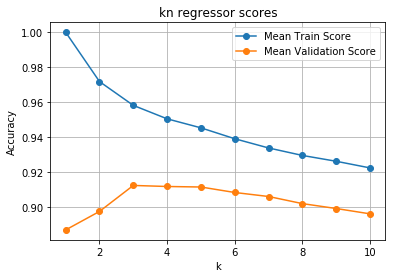

In [9]:
x_axis = range(1,11)
plt.plot(x_axis, grid_kn.cv_results_['mean_train_score'], '-o', label = 'Mean Train Score')
plt.plot(x_axis, grid_kn.cv_results_['mean_test_score'], '-o', label = 'Mean Validation Score')
plt.legend()
plt.grid(True)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('kn regressor scores')

In [10]:
kn_train_accuracy = grid_kn.best_estimator_.score(X_train, y_train)
kn_test_accuracy  = grid_kn.best_estimator_.score(X_test, y_test)

print('KN Regression - Train Accuracy: {}'.format('%.3f'%kn_train_accuracy))
print('KN Regression - Test Accuracy : {}'.format('%.3f '%kn_test_accuracy))

table.append(['KN Regression', grid_kn.best_params_, kn_train_accuracy, kn_test_accuracy])

KN Regression - Train Accuracy: 0.958
KN Regression - Test Accuracy : 0.928 


# RIDGE

Ridge Regression (also called Tikhonov regularization) solves a regression model where the loss function is the linear least squares function  (with l2 regularization) as opposed to ordinary least squares. 
This model minimizes the objective function: ||y - Xw||^2_2 + alpha * ||w||^2_2

Ridge Regression produced the second-best test score when prediciting the dependent variable in this dataset.

In [11]:
# RIDGE
from  sklearn.linear_model import Ridge

powers = range(-3, 3)
x_range = []
for power in powers:
    x_range.append(10 ** power)

ridge = Ridge()
param_grid = {'alpha': x_range, 'fit_intercept': [True, False], 'normalize': [True, False]}
grid_ridge = GridSearchCV(ridge, param_grid, cv=5, n_jobs= -1)
grid_ridge.fit(X_train, y_train)

print("Best Parameters : {}".format(grid_ridge.best_params_))
print("Best CV score   : {}".format('%.3f'% grid_ridge.best_score_))

Best Parameters : {'alpha': 0.001, 'fit_intercept': True, 'normalize': True}
Best CV score   : 0.955


In [12]:
ridge_train_accuracy = grid_ridge.best_estimator_.score(X_train, y_train)
ridge_test_accuracy  = grid_ridge.best_estimator_.score(X_test, y_test)

print('Ridge - Train Accuracy: {}'.format('%.3f'%ridge_train_accuracy))
print('Ridge - Test Accuracy : {}'.format('%.3f '%ridge_test_accuracy))

table.append(['Ridge', grid_ridge.best_params_, ridge_train_accuracy, ridge_test_accuracy])

Ridge - Train Accuracy: 0.960
Ridge - Test Accuracy : 0.954 


,alpha,fit_intercept,normalize
0,0.001,True,True
1,0.001,True,False
2,0.001,False,True
3,0.001,False,False
4,0.010,True,True
5,0.010,True,False
6,0.010,False,True
7,0.010,False,False
8,0.100,True,True
9,0.100,True,False


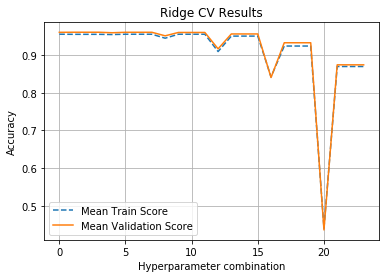

In [13]:
plt.plot(np.arange(0, len(grid_ridge.cv_results_['mean_test_score'])), grid_ridge.cv_results_['mean_test_score'], '--', label = 'Mean Train Score')
plt.plot(np.arange(0, len(grid_ridge.cv_results_['mean_train_score'])), grid_ridge.cv_results_['mean_train_score'], '-', label = 'Mean Validation Score')
plt.legend()
plt.grid(True)
plt.xlabel('Hyperparameter combination')
plt.ylabel('Accuracy')
plt.title('Ridge CV Results')
pd.DataFrame(grid_ridge.cv_results_['params'])

# LASSO

LASSO or Least Absolute Shrinkage and Selection Operator is a Linear Model trained with L1 prior as regularizer.
The optimization objective for Lasso is:
(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

Compared to Ridge regression that can't zero out coefficients, the LASSO does both parameter shrinkage and variable selection automatically. (In Ridge, we either end up including all the coefficients in the model, or none of them at all)

LASSO produces the best prections for the dependent variable in this dataset.

In [14]:
# LASSO

from sklearn.linear_model import Lasso

lasso = Lasso()
param_grid = {'alpha': x_range, 'max_iter': [1000, 10000], 'selection': ['cyclic', 'random']}
grid_lasso = GridSearchCV(lasso, param_grid, cv=5, n_jobs= -1)
grid_lasso.fit(X_train_mm, y_train)

print("Best Parameters : {}".format(grid_lasso.best_params_))
print("Best CV score   : {}".format('%.3f'% grid_lasso.best_score_))

Best Parameters : {'alpha': 0.001, 'max_iter': 1000, 'selection': 'cyclic'}
Best CV score   : 0.955


In [15]:
lasso_train_accuracy = grid_lasso.best_estimator_.score(X_train_mm, y_train)
lasso_test_accuracy  = grid_lasso.best_estimator_.score(X_test_mm, y_test)

print('LASSO - Train Accuracy: {}'.format('%.3f'%lasso_train_accuracy))
print('LASSO - Test Accuracy : {}'.format('%.3f '%lasso_test_accuracy))

table.append(['LASSO', grid_lasso.best_params_, lasso_train_accuracy, lasso_test_accuracy])

LASSO - Train Accuracy: 0.960
LASSO - Test Accuracy : 0.954 


,alpha,max_iter,selection
0,0.001,1000,cyclic
1,0.001,1000,random
2,0.001,10000,cyclic
3,0.001,10000,random
4,0.010,1000,cyclic
5,0.010,1000,random
6,0.010,10000,cyclic
7,0.010,10000,random
8,0.100,1000,cyclic
9,0.100,1000,random


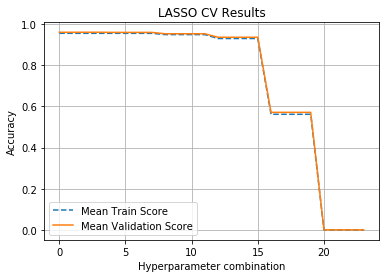

In [16]:
plt.plot(np.arange(0, len(grid_lasso.cv_results_['mean_test_score'])), grid_lasso.cv_results_['mean_test_score'], '--', label = 'Mean Train Score')
plt.plot(np.arange(0, len(grid_lasso.cv_results_['mean_train_score'])), grid_lasso.cv_results_['mean_train_score'], '-', label = 'Mean Validation Score')
plt.legend()
plt.grid(True)
plt.xlabel('Hyperparameter combination')
plt.ylabel('Accuracy')
plt.title('LASSO CV Results')
pd.DataFrame(grid_lasso.cv_results_['params'])

,C,epsilon
0,0.01,0.00
1,0.01,0.01
2,0.01,0.10
3,0.01,1.00
4,0.10,0.00
5,0.10,0.01
6,0.10,0.10
7,0.10,1.00
8,1.00,0.00
9,1.00,0.01


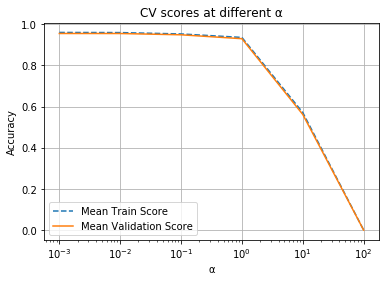

In [52]:
temp = pd.DataFrame(grid_lasso.cv_results_['params'])
temp = temp.assign(mean_test_score = pd.DataFrame(grid_lasso.cv_results_['mean_test_score']))
temp = temp.assign(mean_train_score = pd.DataFrame(grid_lasso.cv_results_['mean_train_score']))
temp_1000 = temp.groupby('alpha')['mean_test_score', 'mean_train_score'].mean().reset_index()
temp_1000
plt.plot(temp_1000['alpha'], temp_1000['mean_train_score'], '--', label = 'Mean Train Score')
plt.plot(temp_1000['alpha'], temp_1000['mean_test_score'], '-', label = 'Mean Validation Score')
plt.legend()
plt.grid(True)
plt.xlabel('α')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.title('CV scores at different α')
pd.DataFrame(grid_lasso.cv_results_['params'])

# Stochastic Gradient Descent (SGD)

SGD is an iterative method which minimizes the cost function with random individual samples. The gradient of the loss is estimated one sample at a time and the model is updated along the way with a decreasing  learning rate.

When predicting the dependent variable for this dataset, SGD Regressor produces a score of greater than 0.9 in test accuracy, however there are other models with superior scores. The model performance improves with increased iterations and prediction scores are optimal when penalizing with l1 regularizer over l2.

In [26]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
param_grid = {'penalty': ['l1', 'l2'], 'max_iter': [1000, 10000, 100000]}
grid_sgd = GridSearchCV(sgd, param_grid, cv=5, n_jobs= -1)
grid_sgd.fit(X_train, y_train)

print("Best Parameters : {}".format(grid_sgd.best_params_))
print("Best CV score   : {}".format('%.3f'% grid_sgd.best_score_))

Best Parameters : {'max_iter': 100000, 'penalty': 'l2'}
Best CV score   : 0.903


In [27]:
sgd_train_accuracy = grid_sgd.best_estimator_.score(X_train, y_train)
sgd_test_accuracy  = grid_sgd.best_estimator_.score(X_test, y_test)

print('SGD - Train Accuracy: %.3f'%sgd_train_accuracy)
print('SGD - Test Accuracy: %.3f '%sgd_test_accuracy)

table.append(['Stochastic Gradient Discent', grid_sgd.best_params_, sgd_train_accuracy, sgd_test_accuracy])

SGD - Train Accuracy: 0.948
SGD - Test Accuracy: 0.916 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


,max_iter,penalty
0,1000,l1
1,1000,l2
2,10000,l1
3,10000,l2
4,100000,l1
5,100000,l2


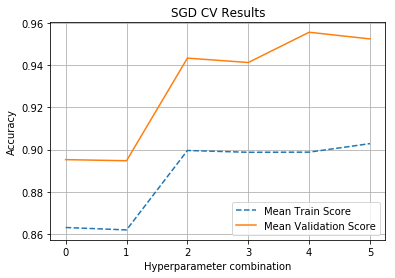

In [28]:
plt.plot(np.arange(0, len(grid_sgd.cv_results_['mean_test_score'])), grid_sgd.cv_results_['mean_test_score'], '--', label = 'Mean Train Score')
plt.plot(np.arange(0, len(grid_sgd.cv_results_['mean_train_score'])), grid_sgd.cv_results_['mean_train_score'], '-', label = 'Mean Validation Score')
plt.legend()
plt.grid(True)
plt.xlabel('Hyperparameter combination')
plt.ylabel('Accuracy')
plt.title('SGD CV Results')
pd.DataFrame(grid_sgd.cv_results_['params'])

# Simple SVR

Simple SVR is Linear Support Vector Regression (without kernels). This method tries to form a hyper-plane which accomodates as many points along its edges.

According to sklearn, SVR with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples. This class supports both dense and sparse input.

The model performed optimally when gamma = 1, epsilon =  0.1 and loss function set to "squared_epsilon_insensitive" (l2)

In [17]:
from sklearn.svm import LinearSVR

powers = range(-2, 1)
e_range = [0]
c_range = []
for power in powers:
    e_range.append(10 ** power)
    c_range.append(10 ** power)

linear_svr = LinearSVR()
param_grid = {'C': c_range, 'epsilon': e_range, 'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive'], 'max_iter': [1000, 10000]}
grid_linear_svr = GridSearchCV(linear_svr, param_grid, cv=5, n_jobs= -1)
grid_linear_svr.fit(X_train, y_train)

print("Best Parameters : {}".format(grid_linear_svr.best_params_))
print("Best CV score   : {}".format('%.3f'% grid_linear_svr.best_score_))

Best Parameters : {'C': 1, 'epsilon': 0, 'loss': 'squared_epsilon_insensitive', 'max_iter': 10000}
Best CV score   : 0.953


In [18]:
linear_svr_train_accuracy = grid_linear_svr.best_estimator_.score(X_train, y_train)
linear_svr_test_accuracy  = grid_linear_svr.best_estimator_.score(X_test, y_test)

print('SVR_simple - Train Accuracy: %.3f'%linear_svr_train_accuracy)
print('SVR_simple - Test Accuracy: %.3f '%linear_svr_test_accuracy)

table.append(['SVR Simple', grid_linear_svr.best_params_, linear_svr_train_accuracy, linear_svr_test_accuracy])

SVR_simple - Train Accuracy: 0.958
SVR_simple - Test Accuracy: 0.952 


,C,epsilon,loss,max_iter
0,0.01,0.00,epsilon_insensitive,1000
1,0.01,0.00,epsilon_insensitive,10000
2,0.01,0.00,squared_epsilon_insensitive,1000
3,0.01,0.00,squared_epsilon_insensitive,10000
4,0.01,0.01,epsilon_insensitive,1000
5,0.01,0.01,epsilon_insensitive,10000
6,0.01,0.01,squared_epsilon_insensitive,1000
7,0.01,0.01,squared_epsilon_insensitive,10000
8,0.01,0.10,epsilon_insensitive,1000
9,0.01,0.10,epsilon_insensitive,10000


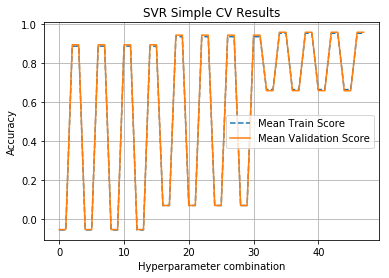

In [19]:
plt.plot(np.arange(0, len(grid_linear_svr.cv_results_['mean_test_score'])), grid_linear_svr.cv_results_['mean_test_score'], '--', label = 'Mean Train Score')
plt.plot(np.arange(0, len(grid_linear_svr.cv_results_['mean_train_score'])), grid_linear_svr.cv_results_['mean_train_score'], '-', label = 'Mean Validation Score')
plt.legend()
plt.grid(True)
plt.xlabel('Hyperparameter combination')
plt.ylabel('Accuracy')
plt.title('SVR Simple CV Results')
pd.DataFrame(grid_linear_svr.cv_results_['params'])

# SVR kernel= 'linear'

In [29]:
from sklearn.svm import SVR

model1 = (SVR(kernel='linear'))

param_grid = {'C': c_range, 'epsilon': e_range}
grid_svr_l = GridSearchCV(model1, param_grid, cv=5, n_jobs= -1)
grid_svr_l.fit(X_train, y_train)

print("Best Parameters : {}".format(grid_svr_l.best_params_))
print("Best CV score   : {}".format('%.3f'% grid_svr_l.best_score_))

Best Parameters : {'C': 1, 'epsilon': 0}
Best CV score   : 0.259


In [30]:
svr_l_train_accuracy = grid_svr_l.best_estimator_.score(X_train, y_train)
svr_l_test_accuracy  = grid_svr_l.best_estimator_.score(X_test, y_test)

print('SVR_kernel_linear - Train Accuracy: %.3f'%svr_l_train_accuracy)
print('SVR_kernel_linear - Test Accuracy: %.3f '%svr_l_test_accuracy)

table.append(['SVR kernel = Linear', grid_svr_l.best_params_, svr_l_train_accuracy, svr_l_test_accuracy])

SVR_kernel_linear - Train Accuracy: 0.287
SVR_kernel_linear - Test Accuracy: 0.314 


,C,epsilon
0,0.01,0.00
1,0.01,0.01
2,0.01,0.10
3,0.01,1.00
4,0.10,0.00
5,0.10,0.01
6,0.10,0.10
7,0.10,1.00
8,1.00,0.00
9,1.00,0.01


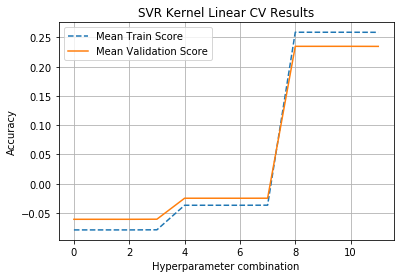

In [31]:
plt.plot(np.arange(0, len(grid_svr_l.cv_results_['mean_test_score'])), grid_svr_l.cv_results_['mean_test_score'], '--', label = 'Mean Train Score')
plt.plot(np.arange(0, len(grid_svr_l.cv_results_['mean_train_score'])), grid_svr_l.cv_results_['mean_train_score'], '-', label = 'Mean Validation Score')
plt.legend()
plt.grid(True)
plt.xlabel('Hyperparameter combination')
plt.ylabel('Accuracy')
plt.title('SVR Kernel Linear CV Results')
pd.DataFrame(grid_svr_l.cv_results_['params'])

# SVR kernel = 'rbf'

In [32]:
model2 = (SVR(kernel='rbf'))

param_grid = {'C': c_range, 'epsilon': e_range, 'gamma': [10**-2, 10**-3], 'shrinking': [True, False] }
grid_svr_rbf = GridSearchCV(model2, param_grid, cv=5, n_jobs= -1)
grid_svr_rbf.fit(X_train_ss, y_train)

print("Best Parameters : {}".format(grid_svr_rbf.best_params_))
print("Best CV score   : {}".format('%.3f'% grid_svr_rbf.best_score_))

Best Parameters : {'C': 1, 'epsilon': 1, 'gamma': 0.01, 'shrinking': False}
Best CV score   : 0.070


In [33]:
svr_rbf_train_accuracy = grid_svr_rbf.best_estimator_.score(X_train_ss, y_train)
svr_rbf_test_accuracy  = grid_svr_rbf.best_estimator_.score(X_test_ss, y_test)

print('SVR_RBF - Train Accuracy: %.3f'%svr_rbf_train_accuracy)
print('SVR_RBF - Test Accuracy: %.3f '%svr_rbf_test_accuracy)

table.append(['SVR kernel = rbf', grid_svr_rbf.best_params_, svr_rbf_train_accuracy, svr_rbf_test_accuracy])

SVR_RBF - Train Accuracy: 0.063
SVR_RBF - Test Accuracy: 0.071 


# SVR kernel = 'poly'

In [34]:
model3 = (SVR(kernel='poly'))

param_grid = {'C': c_range, 'epsilon': e_range, 'degree': [1, 2, 3]}
grid_svr_poly = GridSearchCV(model3, param_grid, cv=5, n_jobs= -1)
grid_svr_poly.fit(X_train, y_train)

print("Best Parameters : {}".format(grid_svr_poly.best_params_))
print("Best CV score   : {}".format('%.3f'% grid_svr_poly.best_score_))

Best Parameters : {'C': 1, 'degree': 1, 'epsilon': 0.01}
Best CV score   : -0.077


In [35]:
svr_poly_train_accuracy = grid_svr_poly.best_estimator_.score(X_train, y_train)
svr_poly_test_accuracy  = grid_svr_poly.best_estimator_.score(X_test, y_test)

print('SVR_poly - Train Accuracy: %.3f'%svr_poly_train_accuracy)
print('SVR_poly - Test Accuracy: %.3f '%svr_poly_test_accuracy)

table.append(['SVR kernel = poly', grid_svr_poly.best_params_, svr_poly_train_accuracy, svr_poly_test_accuracy])

SVR_poly - Train Accuracy: -0.056
SVR_poly - Test Accuracy: -0.082 


# Polynomial Regression
We run a linear model after exponentially transforming the feature set. However this model performed poorly when using the 2nd and 3rd degree transformations of the feature set and was computationally demanding (impossible with available memory) to check higher degrees.

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing  import PolynomialFeatures
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(2,3)}

grid_polyreg = GridSearchCV(PolynomialRegression(), param_grid, cv=5, n_jobs = -1)

grid_polyreg.fit(X_train, y_train)
print("Best parameters: {}".format(grid_polyreg.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_polyreg.best_score_))

Best parameters: {'polynomialfeatures__degree': 2}
Best cross-validation score: -0.08


In [22]:
polyreg_train_accuracy = grid_polyreg.best_estimator_.score(X_train, y_train)
polyreg_test_accuracy = grid_polyreg.best_estimator_.score(X_test, y_test)

print('Polynomial Regression - Train Accuracy: %.3f'%polyreg_train_accuracy)
print('Polynomial Regression - Test Accuracy: %.3f '%polyreg_test_accuracy)
table.append(['Polynomial Regression', grid_polyreg.best_params_, polyreg_train_accuracy, polyreg_test_accuracy])

Polynomial Regression - Train Accuracy: 0.982
Polynomial Regression - Test Accuracy: 0.096 


# Train Test Score Comparison (10% stratified data)

In [36]:
pd.set_option('display.max_colwidth', 0)
final_table = pd.DataFrame(table, columns= ['Model', 'Parameters', 'Training_Accuracy', 'Test_Accuracy'])
final_table.sort_values('Test_Accuracy', ascending = False)

Model  \
2  Ridge                   
0  Linear Regression       
3  LASSO                   
4  SVR Simple              
1  KN Regression           
9  SGD                     
6  SVR kernel = Linear     
5  Polynomial Regression   
7  SVR kernel = rbf        
8  SVR kernel = poly       

                                                                         Parameters  \
2  {'alpha': 0.001, 'fit_intercept': True, 'normalize': True}                         
0  {}                                                                                 
3  {'alpha': 0.001, 'max_iter': 1000, 'selection': 'cyclic'}                          
4  {'C': 1, 'epsilon': 0, 'loss': 'squared_epsilon_insensitive', 'max_iter': 10000}   
1  {'n_neighbors': 3}                                                                 
9  {'max_iter': 100000,'penalty': 'l2}                                                
6  {'C': 1, 'epsilon': 0}                                                             
5  {'polynomialfeatures__degree': 2}                                                  
7  {'C': 1, 'epsilon': 1, 'gamma': 0.01, 'shrinking': False}                          
8  {'C': 1, 'degree': 1, 'epsilon': 0.01}                                             

   Training_Accuracy  Test_Accuracy  
2  0.959970           0.954431       
0  0.960391           0.954325       
3  0.959941           0.954053       
4  0.958311           0.952182       
1  0.958155           0.927733       
9  0.947808           0.916282       
6  0.287069           0.313899       
5  0.982402           0.096465       
7  0.062719           0.070505       
8 -0.056494          -0.082018

# Applying best regressors on complete dataset
### Ridge, LASSO & Linear

In [37]:
X_train_2, X_test_2, y_train_f, y_test_f = train_test_split(df.iloc[:, 0:77], df.iloc[:, -1], random_state = 0, test_size = 0.2)

In [38]:
scaler = MinMaxScaler()
X_train_f = pd.DataFrame(scaler.fit_transform(X_train_2))
X_test_f = pd.DataFrame(scaler.transform(X_test_2))

In [41]:
ridge_final = Ridge(alpha= 0.001, fit_intercept= True, normalize= True)
ridge_final.fit(X_train_f, y_train_f)
ridge_final_train_score = ridge_final.score(X_train_f, y_train_f)
ridge_final_test_score = ridge_final.score(X_test_f, y_test_f)

In [55]:
print('Ridge Final : Train Accuracy: %.3f'%ridge_final_train_score)
print('Ridge Final : Test Accuracy: %.3f '%ridge_final_test_score)

Ridge Final : Train Accuracy: 0.932
Ridge Final : Test Accuracy: 0.948 


In [47]:
lasso_final = Lasso(alpha= 0.01, max_iter= 1000, selection= 'cyclic')
lasso_final.fit(X_train_f, y_train_f)
lasso_final_train_score = lasso_final.score(X_train_f, y_train_f)
lasso_final_test_score = lasso_final.score(X_test_f, y_test_f)

In [56]:
print('Lasso Final : Train Accuracy: %.3f'%lasso_final_train_score)
print('Lasso Final : Test Accuracy: %.3f '%lasso_final_test_score)

SVR_poly - Train Accuracy: 0.931
SVR_poly - Test Accuracy: 0.946 


In [53]:
lreg_final = LinearRegression()
lreg_final.fit(X_train_f, y_train_f)
lreg_final_train_score = lreg_final.score(X_train_f, y_train_f)
lreg_final_test_score = lreg_final.score(X_test_f, y_test_f)

In [58]:
print('Linear Regression Final : Train Accuracy: %.3f'%lasso_final_train_score)
print('Linear Regression Final : Test Accuracy: %.3f '%lasso_final_test_score)

Linear Regression Final : Train Accuracy: 0.931
Linear Regression Final : Test Accuracy: 0.946 


In our analysis Linear regression, Ridge and LASSO have produced the highest accuracy to predict the dependent variable (Annotation).
The scores of these three models are very close. In the current run, Linear Regression has the highest score on full dataset. However since Random state is not mentioned, consecutive runs may provide different results.